#                            Car Dekho Price Prediction

## Objective:


Your job is to determine the price of CarDekho.com new and used cars.

## About the dataset

### Description

- name: the name of the car manufacturer
- year: the year the car was produced
- selling_price: selling price of the car
- km_driven: kilometer driven by car
- fuel: the fuel type of the engine of the car
- seller_type: type of seller , selling the car
- transmission: types of transmission of the car
- owner: whether the car belong to the first owner, second owner or Third Owner
- mileage: mileage of the car
- engine: the engine type of the car
- max_power: horse power of the car
- torque: torque of the car
- seats: how many seats are there in the car


## Importing essentials modules

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Training Dataset

In [2]:
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Inspecting Data

In [3]:
# shape of data
df.shape

(8128, 13)

In [4]:
# missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

- There are some missing values in mileage, engine, max_power, torque, seats.              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.duplicated().sum()

1202

In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Observation
### 1. Missing values in some cols
### 2. Seats is float should be int
### 3. more than 1000 rows are duplicates
### 4. Outliers in year,selling price,seats
### 5. Torque,engine,mileage and max_power have unnecceary units

In [8]:
# drop any row with missing values
df.dropna(inplace=True)

In [9]:
df.shape

(7906, 13)

In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [11]:
# remove duplicate rows
df = df.drop_duplicates(keep='first')

In [12]:
# change data type of seats col
df['seats'] = df['seats'].astype('int32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6717 non-null   object
 1   year           6717 non-null   int64 
 2   selling_price  6717 non-null   int64 
 3   km_driven      6717 non-null   int64 
 4   fuel           6717 non-null   object
 5   seller_type    6717 non-null   object
 6   transmission   6717 non-null   object
 7   owner          6717 non-null   object
 8   mileage        6717 non-null   object
 9   engine         6717 non-null   object
 10  max_power      6717 non-null   object
 11  torque         6717 non-null   object
 12  seats          6717 non-null   int32 
dtypes: int32(1), int64(3), object(9)
memory usage: 708.4+ KB


In [14]:
# Handling mileage col
df['mileage'] = df['mileage'].str.split(expand=True)[0]


In [15]:
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8121     18.9
8122    22.54
8123     18.5
8124     16.8
8125     19.3
Name: mileage, Length: 6717, dtype: object

In [16]:
df['mileage'] = df['mileage'].astype('float64')

In [17]:
# Handling engine col
df['engine'] = df['engine'].str.split(expand=True)[0].astype('int32')


In [18]:
df['engine']


0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8121     998
8122    1396
8123    1197
8124    1493
8125    1248
Name: engine, Length: 6717, dtype: int32

In [19]:
# Handling max_power col
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [20]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5


In [21]:
# dropping the torque col
df.drop(columns=['torque'],inplace=True)

In [22]:
df['name'].unique().shape

(1982,)

In [23]:
# extracting brand from name
df['brand'] = df['name'].str.split(expand=True)[0]

In [24]:
df.drop(columns=['name'],inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti


In [25]:
freq_brands = df['brand'].value_counts()[df['brand'].value_counts()>100].index.tolist()


- extracting top 10 brands

In [26]:
freq_brands

['Maruti',
 'Hyundai',
 'Mahindra',
 'Tata',
 'Honda',
 'Ford',
 'Toyota',
 'Chevrolet',
 'Renault',
 'Volkswagen']

In [27]:
df = df[df['brand'].isin(freq_brands)]

In [28]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [76]:
df_year = df.groupby(['year']).sum()
df_year['year'] = df_year.index
df_year.head()

,selling_price,km_driven,mileage,engine,max_power,seats,year
year,,,,,,,
2000,215957,340000.0,68.00,3184,157.3,17,2000
2001,234000,152108.0,81.70,4177,208.0,21,2001
2002,1775999,1317365.0,266.73,18572,857.8,84,2002
2003,3122599,2635704.0,432.50,38637,2056.5,147,2003
2004,4866855,4356847.0,724.00,56218,3184.5,218,2004


<AxesSubplot:xlabel='year', ylabel='selling_price'>

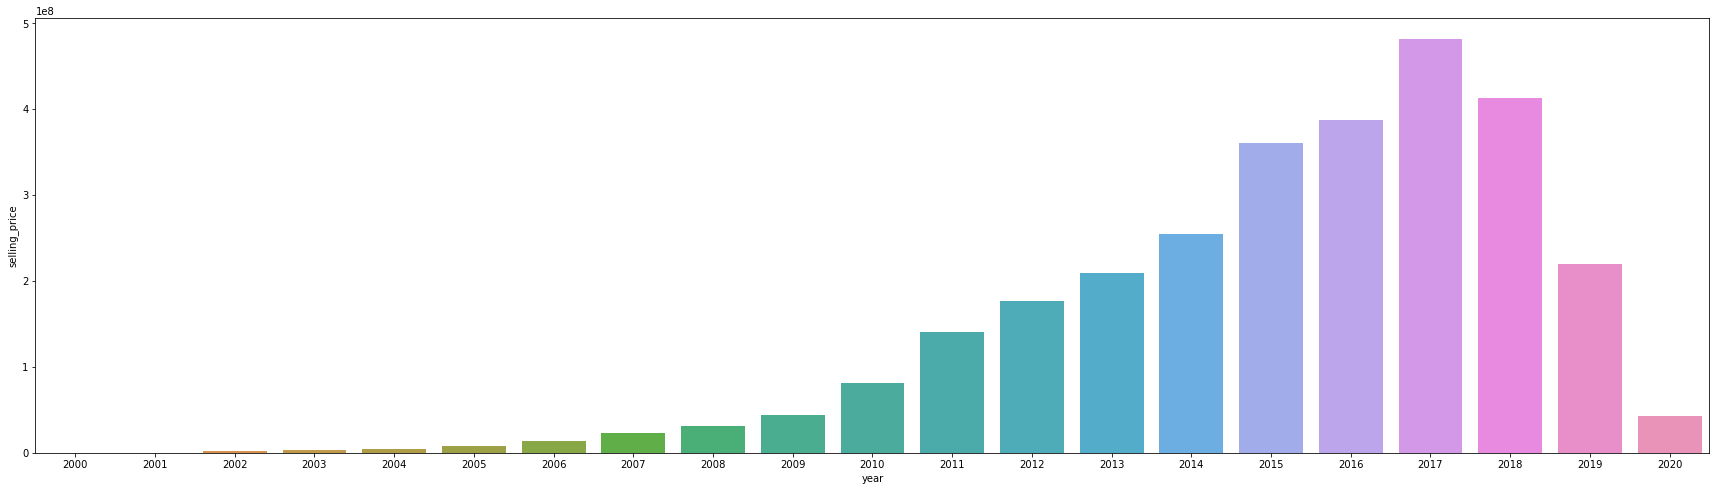

In [77]:
plt.figure(figsize=(30,8))
sns.barplot(x=df_year.year, y=df_year.selling_price)

- From 2002 there is gradual increase in sales price of cars.
- In 2017, there is maximum selling price

In [29]:
df['fuel'].value_counts()

Diesel    3360
Petrol    2832
CNG         51
LPG         35
Name: fuel, dtype: int64

In [30]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [31]:
freq_fuel = ['Diesel','Petrol']
df = df[df['fuel'].isin(freq_fuel)]

In [32]:
df['seller_type'].value_counts()

Individual          5607
Dealer               560
Trustmark Dealer      25
Name: seller_type, dtype: int64

In [33]:
df = df[df['seller_type'].isin(['Individual','Dealer'])]

In [34]:
df['owner'].value_counts()

First Owner             3806
Second Owner            1750
Third Owner              459
Fourth & Above Owner     150
Test Drive Car             2
Name: owner, dtype: int64

In [35]:

df = df[df['owner'].isin(['First Owner','Second Owner','Third Owner'])]

In [36]:
df.shape

(6015, 12)

### Dealing with outliers

C:\Users\kislaykrishna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

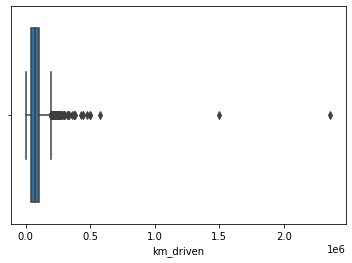

In [37]:
import seaborn as sns
sns.boxplot(df['km_driven'])

In [38]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1

In [39]:
max_val_km_driven = q3 + 1.5*iqr

In [40]:
max_val_km_driven

193000.0

In [41]:
df.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [42]:
df['km_driven'] = np.where(df['km_driven']>max_val_km_driven,max_val_km_driven,df['km_driven'])

C:\Users\kislaykrishna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

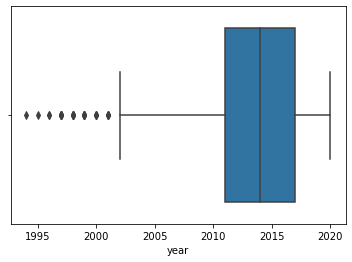

In [43]:
sns.boxplot(df['year'])

In [44]:
df = df[df['year'] >= 2000]

C:\Users\kislaykrishna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

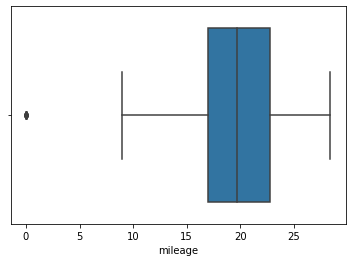

In [45]:
sns.boxplot(df['mileage'])

In [46]:
mean_mileage = df[df['mileage'] !=0]['mileage'].median()
mean_mileage

19.7

In [47]:
df['mileage'] = np.where(df['mileage'] == 0,mean_mileage,df['mileage'])

In [48]:
df.shape

(5988, 12)

In [49]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


### Spliting data into x and y

In [52]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

### Splitting data into train and test split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
# Ordinal encoding on Owner col
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
tnf = ColumnTransformer(
    [
        ('ordinal',OrdinalEncoder(),['owner']),
        ('nominal',OneHotEncoder(drop='first',sparse=False),['fuel','seller_type','transmission','brand'])
    ], remainder='passthrough'
)

In [57]:
X_train_tnf = tnf.fit_transform(X_train)
X_test_tnf = tnf.transform(X_test)

In [58]:
lr = LinearRegression()


In [59]:
lr.fit(X_train_tnf,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(X_test_tnf)

In [61]:
from sklearn.metrics import r2_score

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [63]:
X_train_poly = poly.fit_transform(X_train_tnf)
X_test_poly = poly.transform(X_test_tnf)

In [64]:
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred = lr.predict(X_test_poly)

r2_score(y_test,y_pred)

0.877473225392473

In [65]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(
    [
        ('col-transformer',tnf),
        ('poly',poly),
        ('lr',lr)
    ]
)



In [66]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

In [67]:
r2_score(y_test,y_pred)

0.877473225392473

Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [68]:
scores=[]
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe = Pipeline(
    [
        ('col-transformer',tnf),
        ('poly',poly),
        ('lr',lr)
    ]
)

    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [69]:
np.argmax(scores)

8

In [70]:
scores[np.argmax(scores)]

0.8966638969415168

In [71]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe = Pipeline(
    [
        ('col-transformer',tnf),
        ('poly',poly),
        ('lr',lr)
    ]
)

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8966638969415168

In [72]:
import pickle

In [73]:
df.tail(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
8120,2008,120000,191000.0,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,Hyundai
8121,2013,260000,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,Maruti
8122,2014,475000,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,Hyundai
8123,2013,320000,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,Hyundai
8125,2009,382000,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5,Maruti


In [74]:
pickle.dump(pipe,open('cardekhopricepredict.pkl','wb'))

### Prediction of selling price

In [75]:
pipe.predict(pd.DataFrame(columns=['year','km_driven','fuel','seller_type',"transmission","owner","mileage","engine","max_power","seats","brand"],data=np.array([2008,191000.0,"Diesel",'Individual',"Manual","Second Owner",18.90,1086,62.10,5,"Hyundai"]).reshape(1,11)))

array([263661.79920769])